<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autores: [Neisser Pino R.](https://scholar.google.com.pe/citations?user=pAB28NEAAAAJ&hl=es), [Ricardo Quispe M.](https://github.com/RcrdPhysics)
##Institución: Universidad Nacional Mayor de San Marcos
##Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 6. Ecuaciones Diferenciales II
<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/300px-Runge-Kutta_slopes.svg.png"  width=45% />
</p>

## Outline

1. Runge-Kutta
2. Método del disparo
3. Sistemas de EDOs
4. Problema Físico





## 1. Runge-Kutta (RK )

Los métodos de Runge-Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor inicial.

Sean:

$$ y'(t)=f(t,y(t))$$


una ecuación diferencial ordinaria, con ${\displaystyle f:\Omega \subset \mathbb {R} \times \mathbb {R} ^{n}\to \mathbb {R} ^{n}}$ donde ${\displaystyle \Omega \,}$ es un conjunto abierto, junto con la condición de que el valor inicial de ƒ sea

$${\displaystyle (t_{0},y_{0})\in \Omega .}$$

Entonces el método RK (de orden s) tiene la siguiente expresión, en su forma más general:

$${\displaystyle y_{n+1}=y_{n}+h\,\sum _{i=1}^{s}b_{i}k_{i}} \qquad \qquad (1)$$


donde h es el paso por iteración, o lo que es lo mismo, el incremento ${\displaystyle \Delta t_{n}}$ entre los sucesivos puntos ${\displaystyle t_{n}}$ y ${\displaystyle t_{n+1}}$. Los coeficientes ${\displaystyle k_{i}}$ son términos de aproximación intermedios, evaluados en ƒ de manera local

$${\displaystyle k_{i}=f\left(t_{n}+h\,c_{i}\,,y_{n}+h\,\sum _{j=1}^{s}a_{ij}k_{j}\right)\quad i=1,...,s.} \qquad \qquad (2)$$

con ${\displaystyle a_{ij},b_{i},c_{i}}$ coeficientes propios del esquema numérico elegido, dependiente de la regla de cuadratura utilizada. Los esquemas Runge-Kutta pueden ser explícitos o implícitos dependiendo de las constantes ${\displaystyle a_{ij}}$ del esquema. Si esta matriz es triangular inferior con todos los elementos de la diagonal principal iguales a cero; es decir, ${\displaystyle a_{ij}=0}$ para ${\displaystyle j=i,...,s}$, los esquemas son explícitos.

## 1.1 RK Segundo Orden

De (1) y (2), para s=2, obtenemos el método de Runge-Kutta de orden 2 (RK2):

$$ y_{n+1}=y_n+K2+O(h^3)$$

$$ K_1= h f(x_n,y_n) $$

$$ K_2= h f((x_n +h/2),(y_n+ \frac{1}{2}hK_1))$$

La fórmula básicamente calcula el siguiente valor yn + 1 usando yn actual más el promedio ponderado de dos incrementos:


*   $K_1$ es el incremento basado en la pendiente al comienzo del intervalo, usando $y$.
*   $K_2$ es el incremento basado en la pendiente en el punto medio del intervalo, usando $(y + h K1 / 2)$.

El método es un método de segundo orden, lo que significa que el error de truncamiento local es del orden de $O (h^3)$, mientras que el error acumulado total es de orden $O (h^4)$.

A continuación se muestra la implementación de RK2:

In [ ]:
# METODO RK Orden 2 (Punto Medio)
# f : funcion (EDO)
# Dominio : [a,b]
# y0 : condicion inicial evaluado en 'a'
# n : numero de iteraciones

# EDO :  y' = f(x,y)

def rk2(f,a, b, y0, n) :  

    h = (b - a) / n    # tamaño del paso
    y = y0             # dato inicial 
      
    # BUCLE de las iteraciones  (Por defecto i = 0:M)
    for i in range(1, n + 1) : 
         
        k1 =  f(a, y)                        # calculo de K1  (RK1 = Euler)
        k2 =  f(a + 0.5 * h, y + 0.5 * k1)   # calculo de K2 (depende de K1)

        # CALCULO para el Dominio (a) y Solucion (y)
        # actualización de y_{n+1} (SOLUCION NUMERICA)
        y = y + (h / 6.0) * (1*k1 + 2*k2)     # Corrector de RK (k1 + 2k2) [Taylor]
        # Actualización del siguiente paso
        a = a + h    #(Iteracion 'i')
  
    return y

Problema ejemplo: 
\begin{equation}
\left\{
	       \begin{array}{ll}
		 \frac{dy}{dx}=x+y-2 \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}

In [ ]:
# EDO: y'= x+y-2

def dydx(x, y) : 
    return (x + y - 2)

##########
a=0       # punto inicial del dominio
b=2       # punto final del dominio  [VALOR de la Solucion numerica]
y0=1      # condicion inicial
n=10000   # numero de iteraciones

print("y(2) = ",rk2(dydx,a,b, y0, n))

y(2) =  0.3968050288936252


### 1.2 RK de orden 4 (RK4)

De (1) y (2), para s=4, obtenemos el método de RK4:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{i+1} = x_i +\Delta x \\
		 y_{i+1} = y_i + \frac{\Delta x}{6} \left( K_1 + 2K_2 +2 K_3 +K_4 \right)
	       \end{array}
	     \right.
\end{equation}

donde: 

\begin{equation}
\left\{
	       \begin{array}{ll}
		 K_1 = f(x_i,y_i) \\
		 K_2 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_1\right) \\
         K_3 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_2\right) \\
         K_4 = f(x_i +\Delta x,y_i +\Delta x K_3)
	       \end{array}
	     \right.
\end{equation}

De aqui vemos que el método RK4 toma una mejor estimacion de la pendiente, ya que (dado un intervalo $[x_i,x_{i+1}]$) considera un promedio ponderado de la pendiente en el extremo izquierdo $K_1$, dos pendientes mejoradas en el punto medio $K_2$ y $K_3$ y una pendiente en el extremo derecho $K_4$. 

In [ ]:
# METODO RK Orden 4
# f : funcion (EDO)
# Dominio : [a,b]
# y0 : condicion inicial evaluado en 'a'
# n  : numero de iteraciones

# EDO :  y' = f(x,y)

import numpy as np

# OBS. VECTOR de 'N' datos :  V[0 : N-1]

def rk4(f,a,b,y0,n): 
    x    = np.zeros(n+1)  # definir un vector con 'n+1' valores CERO : DOMINIO  (almacenar los datos)
    y    = np.zeros(n+1)  # definir un vector con 'n+1' valores CERO : SOLUCION (almacenar los datos)
    h   = (b-a)/n         # tamaño de paso

    x[0] = a   # almacenando el pto inicial del Dominio
    y[0] = y0  # almacenando la condicion inicial (solucion)

    # BUCLE iteraciones : 1 hasta 'n' (Considere el pto final del Dominio)
    for i in range(n):
        
        x[i+1] = x[i] + h  # vector DOMINIO (iteracion)  

        # Constantes de RUNGE-KUTTA 4
        k1 = f(x[i],y[i])                   # K1 : Cte (Euler)
        k2 = f(x[i]+0.5*h,y[i]+0.5*h*k1)    # K2 : Depende de K1
        k3 = f(x[i]+0.5*h,y[i]+0.5*h*k2)    # K3 : Depende de K2
        k4 = f(x[i]+h,y[i]+h*k3)            # K4 : Depende de K3

        y[i+1] = y[i] + (h/6.0)*(1*k1 +2*k2 + 2*k3 + 1*k4)  # Vector SOLUCION (Corrector RK)

    return x,y

Problema ejemplo:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = ty + t^3 \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}

La solucion analítica de este problema se puede determinar por el método de factor integrante, según el cual dada una ecuacion diferencial en la forma  $y' + f(t) y = g(t)$, se sabe que la solución estará dada por:

\begin{equation}
    y(t) = \frac{\int g(t)\mu(t)dt + C}{\mu(t)}
\end{equation}

donde el factor integrante $\mu(t)$ se calcula como:

\begin{equation}
    \mu(t) = e^{\int f(t)dt}
\end{equation}

para este caso tenemos que $f(t) = -t$ y $g(t) = t^3$, de lo cual:

\begin{equation}
    \mu(t) = e^{\int -t dt} = e^{-t^2/2}
\end{equation}

entonces: 

\begin{equation}
    y(t) = \frac{\int t^3 e^{-t^2/2} dt + C}{e^{-t^2/2}} 
            = Ce^{t^2/2} -t^2 - 2
\end{equation}

Reemplazando la condicion inicial se obtiene que $C = 3$. Y finalmente la soución al problema de valor inicial esta dada por:

\begin{equation}
    y(t) = 3e^{t^2/2} -t^2 - 2
\end{equation}

RK2 : Solucion y(2) =  8.416460165280052
RK4 : Solucion y(2) =  16.166997669973338
Sol. Exacta  : y(2) =  16.16716829679195


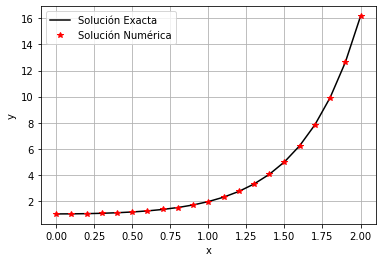

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#########################

# Funcion : Ecuacion Diferencial
def fs(t,y):
    return t*y + pow(t,3)

# Funcion : Solucion Analitica (EDO)
def ex_sol(t):
    return 3*np.exp(t*t/2.0)-t*t-2

###  DATOS  #####
a=0.    # pto inicial del dominio
b=2.    # pto final del dominio (Sol. Numerica)
n=20    # numero de iteraciones
y0=1.   # condicion inicial y(a)

#########
## Aplicar RK4
## xx : vector DOMINIO
## yy : vector SOLUCION

xx, yy = rk4(fs,a,b,y0,n)

# GRAFICA DE LA SOLUCION
# Grafica de la Solucion EXACTA
plt.plot(xx,ex_sol(xx),color='k',label = 'Solución Exacta')

# Grafica de la Solucion NUMERICA
plt.plot(xx,yy,'r*',label = 'Solución Numérica')

plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

#######################
#print("RK2 : Solucion y(2) = ",rk2(fs,0,2,1,20))
print('RK4 : Solucion y(2) = ',yy[20])
print('Sol. Exacta  : y(2) = ',ex_sol(2))

## 2. Método del Disparo

Los **métodos de disparo** se desarrollan con el objetivo de transformar los problemas de valor inicial (PVI) de EDOs en un PVI equivalente, luego podemos resolverlo usando los métodos que ya conocemos. En los PVI, podemos comenzar en el valor inicial y avanzar para obtener la solución. Pero este método no funciona para los problemas con condiciones de contorno, porque no hay suficientes condiciones de valor inicial para resolver la EDO y obtener una solución única. Por lo tanto, los métodos de disparo se desarrollaron para superar esta dificultad.
<p align="center">
<img src="https://pythonnumericalmethods.berkeley.edu/_images/23.02.01-shooting.png" alt="Shooting" title="The shooting of a target." width="500"/>
<p>

El nombre del método de tiro se deriva de una analogía con el tiro al blanco: como se muestra en la figura anterior, disparamos al blanco y observamos dónde golpea el blanco, basándonos en los errores, podemos ajustar nuestra puntería y disparar nuevamente con la esperanza que golpeará cerca del objetivo. Podemos ver por la analogía que el método de disparo es un método iterativo.

Veamos cómo funcionan los métodos de disparo usando la EDO de segundo orden dada $f(a) = f_a$ y $f(b) = f_b$

$$
F\left(x, f(x), \frac{df(x)}{dx}\right) = \frac{d^{2}f(x)}{dx^{2}}
$$



*   **Paso 1:** Comenzamos todo el proceso adivinando $ f '(a) = \alpha$, junto con $ f (a) = f_a $, convertimos el problema anterior en un problema de valor inicial con dos condiciones todas sobre el valor $ x = a $. Este es el paso de **objetivo**.
*   **Paso 2:** Usando lo que aprendimos del anteriormente, es decir, podemos usar el método de Runge-Kutta, para integrar al otro límite $b$ para encontrar $ f (b) = f_\beta $. Este es el paso de **disparo**.
*   **Paso 3:** Ahora comparamos el valor de $f_\beta$ con $f_b$, normalmente nuestra estimación inicial no es buena, y $ f_\beta \ne f_b $, pero lo que queremos es $ f_\beta - f_b = 0 $, por lo tanto, ajustamos nuestras estimaciones iniciales y repetimos. Hasta que el error sea aceptable, podemos detenernos. Este es el paso iterativo.


Podemos ver que las ideas detrás de los métodos de disparo son muy simples. Pero comparar y encontrar las mejores conjeturas no es fácil, este procedimiento es muy tedioso. Pero esencialmente, encontrar la mejor suposición para obtener $ f_\beta - f_b = 0 $ es un problema de búsqueda de raíz, una vez que nos damos cuenta de esto, tenemos una forma sistemática de buscar la mejor suposición. Dado que $ f_\beta $ es una función de $ \alpha $, por lo tanto, el problema se convierte en encontrar la raíz de $ g(\alpha) - f_b = 0 $. Podemos usar cualquier método del capítulo 19 para resolverlo.



### Ejemplo:

Saldremos a lanzar un cohete, y sea $y(t)$ la altitud (metros desde la superficie) del cohete en el tiempo t. Conocemos la gravedad $ g = 9.8 m / s^2 $. Si queremos tener el cohete a 50 m del suelo después de 5 segundos después del lanzamiento, ¿cuál debería ser la velocidad de lanzamiento? (ignoramos el arrastre de la resistencia del aire).

Para responder a esta pregunta, podemos enmarcar el problema en un problema de valor límite para una EDO de segundo orden. La EDO es:

$$ \frac{d^2y}{dt^2} = -g$$

con las dos condiciones de contorno son: $ y (0) = 0 $ y $ y (5) = 50 $. Y queremos responder a la pregunta, ¿cuál es el $ y '(0) $ en el lanzamiento?

Esta es una pregunta bastante simple, podemos resolverla analíticamente fácilmente, con la respuesta correcta $ y '(0) = 34.5 $. 

Ahora vamos a resolverlo usando el método de disparo. Primero, reduciremos el orden de la función, la EDO de segundo orden se convierte en:

$$ \frac{dy}{dt} = v$$

$$ \frac{dv}{dt} = -g$$

Por lo tanto, obtenemos $S(t) = \left[\begin{array}{c} y(t) \\v(t) \end{array}\right]$: 



$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
0 & -g/v
\end{array}\right]S(t).
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# LIBRERIA EDO NUMERICO (Python)
from scipy.integrate import solve_ivp
#plt.style.use('seaborn-poster')

%matplotlib inline

Comencemos con nuestra primera suposición, suponemos que la velocidad de lanzamiento es de 25 m / s.

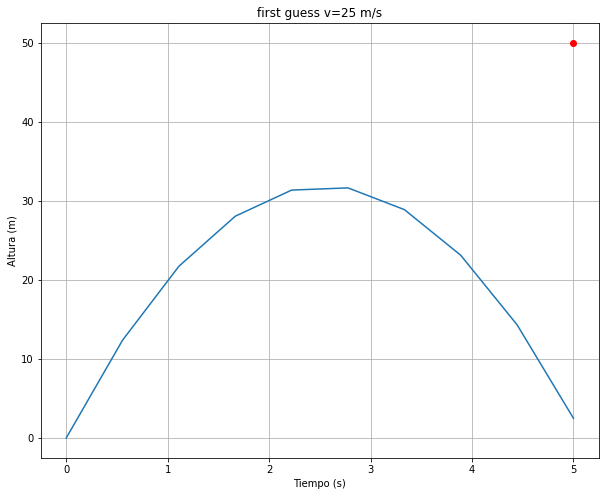

In [ ]:
# FUNCION : Vector    (Una Ecuacion)            y'=f(x,y)   Solucion : y funcion real de variable real
# FUNCION : Matricial (Sistema de Ecuaciones)   Y'=F(x,Y)   Solucion : Y funcion vectorial de variable real

# Sistema EDO : 3 variables
# np.array( [ A , B , C ] )  : Matriz (A vector fila, B vector fila, C vector fila)
# problema :  (y,v,z) matematicas >>  ( W[0] , W[1] , W[2] ) Python

# np.dot(R,G) : Producto dos matrices

# EDO : t (Tiempo : variable temporal)
# EDO : s (Variables dependientes del tiempo) : s[0] , s[1] , ...
def F(t,s):
  return (np.dot(np.array([ [0,1],[0,-9.8/s[1] ]]),s))

#############
# condicion inicial del Sistema (y,v)
y0 = 0    # altura inicial
v0 = 25   # velocidad inicial 

# vector temporal (dominio EDO)
t_eval = np.linspace(0, 5, 10)

# SOLUCION SCYPY SOLVE (ODE)
# solve_ivp(funcion, tiempo, condicion inicial, vector dominio, METODO)
# Metodo RUNGE-KUTTA 4 : RK45    ( Matlab : ode45() )  

sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval, method='RK45') 

## sol.t : vector dominio (Tiempo)
## sol.y[0] : variable "y"
## sol.y[1] : variable "v" 

###########
plt.figure(figsize = (10, 8))   # Tamaño de la figura 
plt.plot(sol.t, sol.y[0])       # Grafica de la SOLUCION
plt.plot(5, 50, 'ro')           # Grafica de un punto
plt.xlabel('Tiempo (s)')        # Eje X
plt.ylabel('Altura (m)')        # Eje Y
plt.grid()
plt.title(f'Primer Intento v={v0} m/s')
plt.show()

De la figura vemos que la primera conjetura es un poco pequeña, ya que con esta velocidad a 5 s, la altitud del cohete es menor a 10 m. El punto rojo en la figura es el objetivo que queremos alcanzar. Ahora ajustemos nuestra suposición y aumentemos la velocidad a 40 m / s.

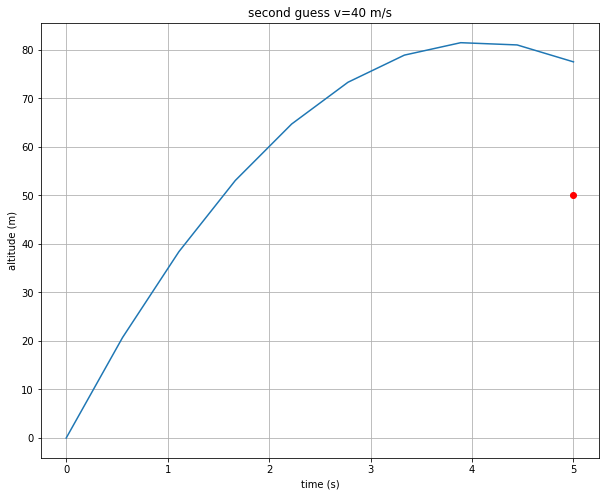

In [ ]:
v0 = 40
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval, method='RK45')

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')  # title(f : impresion valor numerico en un texto)
plt.grid()
plt.show()

Podemos ver que esta vez sobrestimamos la velocidad. Por lo tanto, esta suposición aleatoria no es fácil para encontrar el mejor resultado. Como mencionamos anteriormente, si tratamos este procedimiento como búsqueda de raíz, entonces tendremos una buena manera de buscar el mejor resultado. Usemos * fsolve * de Python para encontrar la raíz. Podemos ver en el siguiente ejemplo, encontramos la respuesta correcta directamente.

In [ ]:
from scipy.optimize import fsolve

# Funcion OBJETIVO : Buscar la velocidad inicial adecuada  y(5)=50
def objective(v0):
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)  # PROBLEMA (Disparo) 
    y = sol.y[0]  # variable dependiente 'y' (altura)
    return y[-1] - 50

vop, = fsolve(objective, 10)   # velocidad inicial (OPTIMA) 
print('Velocidad Inicial (Optima) : ',v0)

Velocidad Inicial (Optima) :  34.499999999999986


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


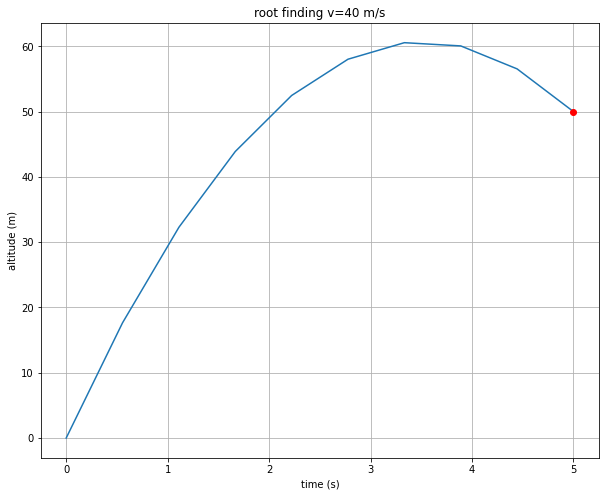

In [ ]:
# RESOLUCION EDO : Velocidad optima (recomendada) 
# vop : velocidad inicial optima 
sol = solve_ivp(F, [0, 5], [y0, vop], t_eval = t_eval, method='RK45')

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.grid()
plt.show()

## 3. Sistemas de EDOs

Generalmente, la mayoría de los problemas se presentan en la forma de sistemas de ecuaciones diferenciales ordinarias, es decir, que incluyen varias ecuaciones a resolver. 

Para ver como podemos utilizar a integrate.odeint para resolver este tipo de problemas, consideremos el siguiente sistema de ecuaciones diferenciales ordinarias, conocido el atractor de Lorenz.

**EL ATRACTOR DE LORENZ**

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros $\rho, \sigma, \beta$, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker (2002). El atractor extraño en este caso es un fractal de dimensión de Hausdorff entre 2 y 3. Grassberger (1983) ha estimado la dimensión de Hausdorff en 2,06 ± 0,01 y la dimensión de correlación en 2,05 ± 0,01.

El sistema aparece en láseres, en generadores eléctricos y en determinadas ruedas de agua.

\begin{align}
x'(t) &= \sigma(y-x)  \\
y'(t) &= x(\rho - z) - y \\
z'(t) & = xy - \beta z
\end{align}

donde $\sigma$ es llamado el número de Prandtl y $\rho$ se llama el número de Rayleigh.

usualmente $\rho=10$, $\beta=8/3$ y b es variado. El sistema exhibe un comportamiento caótico para $\rho=28$ pero muestra órbitas periódicas para otros valores de b; por ejemplo, con $\rho=99.96$ se convierte en un nudo tórico. La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del efecto mariposa en la teoría del caos.

Estas ecuaciones son conocidas por sus soluciones caóticas, que dependen sensiblemente de los valores de los parámetros $\rho, \sigma, \beta$. Veamos como podemos resolverlas con la ayuda de Python.

In [ ]:
import numpy as np
from scipy.integrate import odeint   # odeint : EDO NUMERICO
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos el sistema de ecuaciones
# xyz : variables dependientes
# t : variable indpendiente
# paramentros : sigma,rho,beta

def lorenz(xyz, t, sigma, rho, beta):
    x, y, z = xyz  # definicion explicita de la variable dependiente 

    return [sigma * (y - x) , x * (rho - z) - y , x * y - beta * z]
  # return [sigma * (S[1] - S[0]) , S[0] * (rho - S[2]) - S[1] , S[0] * S[1] - beta * S[2] ]

# Asignamos valores a los parámetros
# sigma, rho, beta = 8, 28, 8/3.0 

sigma = 8.
rho = 99.
beta = 8/3


# Condición inicial y valores de t sobre los que calcular
xyz0 = [1.0, 1.0, 1.0]

# vector dominio (tiempo)
t = np.linspace(0, 25, 10000)

# Resolvemos las ecuaciones diferenciales
# odeint( funcion EDO , condicion inicial , t , parametros(args) )
xyz1 = odeint(lorenz, xyz0, t, args=(sigma, rho, beta))

xyz2 = odeint(lorenz, xyz0, t, args=(sigma, rho, 0.6*beta))

xyz3 = odeint(lorenz, xyz0, t, args=(2*sigma, rho, 0.6*beta))

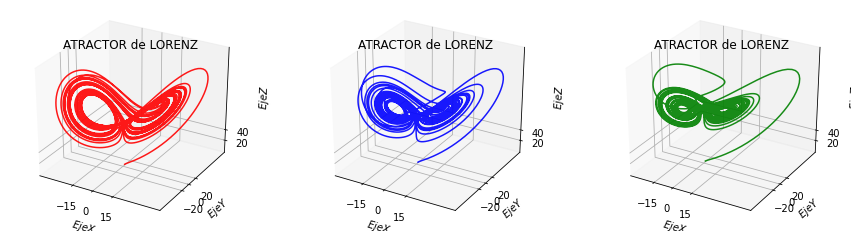

In [ ]:
# Graficamos las soluciones
# Libreria Grafica 3D
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Grafica de 3 PLOTEOS
# plt.subplots : varias graficas en una sola FIGURA
# figsize : tamaño de la FIGURA
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4),subplot_kw={'projection':'3d'})

# for : bucle para figuras
# (ax , xyz , color=' ') : (figura axis , variable Solucion , color)
# xyz = [ x(t)=xyz[0] , y(t)=xyz[1] , z(t)=xyz[2] ] 

# PLOTEO : PLANO FASE  ( X vs Y vs Z )  >> ATRACTOR LORENZ
# PLOTEO : PLANO TEMPORAL (t vs X) , (t vs Y) , (t vs Z)

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:

    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.9)    # alpha : desvanecimiento de la curva
    ax.set_xlabel('$Eje X$', fontsize=10)                  # fontsize : Tamaño de impresion 
    ax.set_ylabel('$Eje Y$', fontsize=10)
    ax.set_zlabel('$Eje Z$', fontsize=10)

    ax.set_xticks([-15, 0, 15])  # AXIS : Eje cartesiano 
    ax.set_yticks([-20, 0, 20])  # AXIS : Eje cartesiano 
    ax.set_zticks([0, 20, 40])   # AXIS : Eje cartesiano 

    #ax.set_title('ATRACTOR de LORENZ')  # IMPRIME TITULO A TODAS LAS GRAFICAS
    ax1.set_title('ATRACTOR de LORENZ')
    ax2.set_title('ATRACTOR de LORENZ')
    ax3.set_title('ATRACTOR de LORENZ')

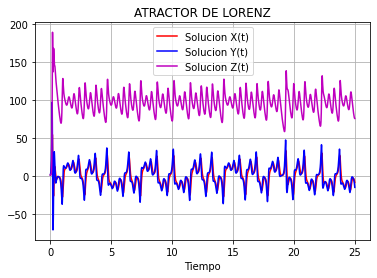

In [ ]:
# PLANO TEMPORAL DE LAS SOLUCIONES

# PLOT de la SOLUCION X(t)
plt.plot(t,xyz[:,0],color='r',label='Solucion X(t)')

# PLOT de la SOLUCION Y(t)
plt.plot(t,xyz[:,1],color='b',label='Solucion Y(t)')

# PLOT de la SOLUCION Z(t)
plt.plot(t,xyz[:,2],color='m',label='Solucion Z(t)')

plt.xlabel('Tiempo')
plt.grid()
plt.title('ATRACTOR DE LORENZ')
plt.legend()

## 4. Problema Físico

### 4.1. **Péndulo Doble**

Las ecuaciones diferenciales no lineales simples pueden tener soluciones complicadas y caóticas. En este problema estudiaremos el movimiento caótico del **péndulo doble**. Aunque el movimiento es caótico, las gráficas de espacio-fase revelan un hermoso orden subyacente en el caos.

El péndulo doble se muestra en la figura a continuación. Consiste en dos péndulos simples, donde la masa del primer péndulo es el punto de pivote del segundo.  Sean $m_i$ y $L_i$ la masa y la longitud del i-ésimo péndulo simple, respectivamente. $θ_1$ es el ángulo entre la dirección vertical y el primer péndulo, y $θ_2$ es el ángulo entre la dirección vertical y el segundo, como se muestra en la figura. Tenga en cuenta que solo hay dos grados de libertad, $θ_1$ y $θ_2$. Sin embargo, esto es suficiente para obtener un movimiento caótico.

<p align="center">
<img src="https://www.numfys.net/media/notebooks/images/double_pendulum.png" alt="Shooting" title="The shooting of a target." width="30%"/>
<p>


### Ecuaciones de movimiento

Considere la configuración de la figura. La posición de la masa $ m_1 $ es

\begin{equation}
\begin{aligned}
x_1 &= L_1\sin\theta_1\\
y_1 &= -L_1\cos\theta_1.
\end{aligned}
\end{equation}

La posición de la masa $m_2$ puede ser expresada como:

\begin{equation}
\begin{aligned}
x_2 &= x_1 + L_2\sin\theta_2\\
y_2 &= y_1 -L_2\cos\theta_2.
\end{aligned}
\end{equation}

Usando ese $v_1^2 = \dot x_1^ 2 + \dot y_1^2$ y $ v_2 ^ 2 = \dot x_2 ^ 2 + \dot x_2 ^ 2 $ y las ecuaciones de posiciones, es fácil mostrar que las energías cinéticas de las masas se vuelven 

\begin{equation}
\begin{aligned}
T_1 &= \frac{1}{2}m_1v_1^2 = \frac{1}{2}m_1L_1^2\dot\theta_1^2,\\
T_2 &= \frac{1}{2}m_2v_2^2 = \frac{1}{2}m_2\left(L_1^2\dot\theta_1^2 + L_2^2\dot\theta_2^2+2L_1L_2\cos(\theta_1-\theta_2)\dot\theta_1\dot\theta_2\right).
\end{aligned}
\end{equation}

Las energías potenciales son:

\begin{equation}
\begin{aligned}
V_1 &= m_1gy_1 = -m_1gL_1\cos\theta_1,\\
V_2 &= m_2gy_2 = -m_2g\left(L_1\cos\theta_1+L_2\cos\theta_2\right).
\end{aligned}
\end{equation}

Ahora formamos el $ L = T-V = T_1 + T_2-V_1-V_2 $ de Lagrange a partir de la ecuación de las energías cinéticas y potenciales, y lo insertamos en las ecuaciones de Euler-Lagrange dadas por:


\begin{equation}
\frac{\partial L}{\partial \theta_1} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_1}
\end{equation}

y

\begin{equation}
\frac{\partial L}{\partial \theta_2} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_2}.
\end{equation}

La ecuación $\frac{\partial L}{\partial \theta_1}$ produce:

\begin{equation}
-m_1gL_1\sin\theta_1-m_2L_1g\sin\theta_1 = (m_1+m_2)L_1^2\ddot\theta_1 + m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta^2 + m_2L_1L_2\cos(\theta_1 - \theta_2)\ddot\theta_2,
\end{equation}

mientras que la ecuación $\frac{\partial L}{\partial \theta_1}$ muestra

\begin{equation}
-m_2gL_2\sin\theta_2 = m_2L_2^2\ddot\theta_2 + m_2L_1L_2\cos(\theta_1-\theta_2)\ddot\theta_1-m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta_1^2.
\end{equation}

Si resolvemos $ \ddot \theta_1 $ y $ \ddot \theta_2 $ obtenemos después de algunas manipulaciones

\begin{equation}
\begin{aligned}
\ddot\theta_1 &= \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_1^2 + L_2m_2\sin(\theta_1-\theta_2)\dot\theta_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right],\\
\ddot\theta_2 &= \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\dot\theta_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right],\\
\end{aligned}
\end{equation}

con

\begin{equation}
\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2.
\end{equation}

Las ecuaciones de $\ddot \theta_1$ y $\ddot \theta_2$ son las ecuaciones de movimiento para el péndulo doble. Es conveniente introducir $ \omega_i \equiv \dot \theta_i $ y volver a expresar las ecuaciones de movimiento como cuatro ecuaciones diferenciales de primer orden.


In [ ]:
from scipy.integrate import odeint
from numpy import cos, sin, arange, pi
import matplotlib.cm as cm
%matplotlib inline

figsize = 10
dpi = 600
g = 9.81     # [m/s^2]. Gravitational acceleration

## Movimiento del péndulo doble

Las ecuaciones de movimiento serían:

\begin{align}
\dot\omega_1 &= \frac{1}{L_1\xi}\left[L_1m_2c_{12}s_{12}\omega_1^2 + L_2m_2s_{12}\omega_2^2 - m_2gc_{12}s_2 + (m_1+m_2)gs_1 \right],\\
\dot\omega_2 &= \frac{1}{L_2\xi}\left[L_2m_2c_{12}s_{12}\omega_2^2 + L_1(m_1+m_2)s_{12}\omega_1^2+(m_1+m_2)gs_1c_{12} - (m_1+m_2)gs_2 \right],\\
\omega_1 &= \dot\theta_1,\\
\omega_2 &= \dot\theta_2,
\end{align}

donde hemos definido $ c_{12} \equiv \cos (\theta_1- \theta_2)$, $ s_ {12} \equiv \sin (\theta_1- \theta_2) $, $ s_i \equiv \sin (\theta_i) $ y $ \xi \equiv c_{12}^2m_2-m_1-m_2 $ para simplificar la notación. Tenga en cuenta que hemos escrito las ecuaciones como cuatro ecuaciones diferenciales ordinarias de primer orden acopladas, lo que significa que podemos resolver fácilmente el problema de valor inicial correspondiente utilizando, p. el método de Euler o el método de Runge-Kutta de cuarto orden. En este cuaderno usaremos el integrador `odeint` de` scipy`. Esta función resuelve el problema del valor inicial para sistemas rígidos o no rígidos de odas de primer orden. Para usar `odeint` necesitamos crear una función que evalúe el lado derecho de las ecuaciones de movimiento. También será conveniente definir una función que transforme $ \omega_1 $, $ \omega_2 $, $ \theta_1 $ y $ \theta_2 $ en coordenadas cartesianas $ \mathbf{v}_1 $, $ \mathbf{v}_2 $ , $ \mathbf{x}_1 $ y $ \mathbf{x}_2 $.     

In [ ]:
def RHS(z, t, L1, L2, m1, m2, g):
    """ Return the right hand side of the 
    ordinary differential equation describing
    the double pendulum.
    """
    theta1, w1, theta2, w2 = z

    cos12 = cos(theta1 - theta2)
    sin12 = sin(theta1 - theta2)

    sin1 = sin(theta1)
    sin2 = sin(theta2)

    xi = cos12**2*m2 - m1 - m2

    w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2 - m2*g*cos12*sin2 + (m1 + m2)*g*sin1)/(L1*xi)

    w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2 + (m1 + m2)*g*sin1*cos12 - (m1 + m2)*g*sin2 )/(L2*xi)

    return w1, w1dot, w2, w2dot

def to_cartesian(theta1, w1, theta2, w2, L1, L2):
    """ Transforms theta and omega to cartesian coordinates
    and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    """
    # posicion 1 (masa 1)
    x1 = L1 * sin(theta1)
    y1 = -L1 * cos(theta1)

    # posicion 2 (masa 2)
    x2 = x1 + L2 * sin(theta2)
    y2 = y1 - L2 * cos(theta2)

    # velocidad 1 (masa 1)
    vx1 = L1*cos(theta1)*w1
    vy1 = L1*sin(theta1)*w1

    # velocidad 2 (masa 2)
    vx2 = vx1 + L2*cos(theta2)*w2
    vy2 = vy1 + L2*sin(theta2)*w2

    return x1, y1, x2, y2, vx1, vy1, vx2, vy2

Ahora necesitamos definir los parámetros en la configuración. ¡Juega con condiciones iniciales y diferentes parámetros!

Aquí, hacemos la elección (arbitraria) $ 2L_1 = L_2 $ y $ m_1 = 3m_2 $, y dejaremos que el péndulo oscile durante 50 segundos.

In [ ]:

# LONGITUD DE LA CUERDA
L1, L2 = 1. , 2.

# MASA DE LAS PELOTAS
m1, m2 = 3. , 1.

# Condicion inicial del Sistema
z0 = [np.pi/2, 0, np.pi/2, 0]

# Tiempo maximo, variacion temporal
tmax, dt = 50, 0.01
# VECTOR DOMINIO (TIEMPO)
t = arange(0, tmax+dt, dt)

Ahora estamos listos para realizar la simulación y transformar los resultados a coordenadas cartesianas.

In [ ]:
# Perform simulation
# SIMULACION ( Funcion RHS , condicion inicial, TIEMPO, Parametros)
z = odeint(RHS, z0, t, args=(L1, L2, m1, m2, g))

# Extract result de la MATRIZ SOLUCION (Coord. POLAR)
theta1, w1, theta2, w2 = z[:,0], z[:,1], z[:,2], z[:,3]

# TRANSFORMACION de POLAR a CARTESIANA
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = to_cartesian(theta1, w1, theta2, w2, L1, L2)

¡Ahora podemos graficar los resultados! Con este fin, creamos la función `plot_position ()`, a continuación:

In [ ]:

def plot_position(x1, y1, x2, y2, theta1, theta2, t):
    """ Plots the motion of the double pendulum in the
    xy-plane, as well as the angles and the angular
    velocities as a function of time.
    
    x1     : array-like, size(n,). x-posision of mass 1
    y1     : array-like, size(n,). y-posision of mass 1
    x2     : array-like, size(n,). x-posision of mass 2
    y2     : array-like, size(n,). y-posision of mass 2
    theta1 : array-like, size(n,). The first angle in the double pendulum
    theta2 : array-like, size(n,). The second angle in the double pendulum
    t      : array-like, size(n,). Time
    """
    # DEFINICION PARA LA FIGURA (PLOTEO)
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)

    ###############################
    # PLANO XY (Plano FASE)
    L = 1.1*(L1 + L2)  # LONGITUD TOTAL de la CUERDA
    ax = plt.subplot(2, 2, (1, 3), autoscale_on=False, xlim=(-L, L), ylim=(-L, L))

    ax.plot(x1, y1, label=r"BOLA $m_1$")
    ax.plot(x2, y2, label=r"BOLA $m_2$")

    ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Posicion Inicial", c='k')
    plt.ylabel(r"$y/L$")
    plt.xlabel(r"$x/L$")
    ax.legend()
    plt.grid()

    ###############################
    # PLANO TEMPORAL (t vs X(t))
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, theta1, label=r"$\theta_1(t)$")
    ax.plot(t, theta2, label=r"$\theta_2(t)$")

    plt.ylabel(r"$\theta$, [rad]")
    plt.xlabel(r"$t$, [s]")
    ax.legend()
    ax.grid()
    plt.xlim([0, np.max(t)])  # Eje Temporal : [0,Tmax]

    ###############################
    # PLANO TEMPORAL (t vs Y(t))
    ax = plt.subplot(2, 2, 4)
    ax.plot(t, w1, label=r"$\omega_1(t)$")
    ax.plot(t, w2, label=r"$\omega_2(t)$")
    plt.ylabel(r"$\omega$, [rad/s]")
    plt.xlabel(r"$t$, [s]")
    plt.xlim([0, np.max(t)])
    ax.legend()
    ax.grid()

    plt.show()
    

In [ ]:
plot_position(x1, y1, x2, y2, theta1, theta2, t)

Como se puede ver, el resultado es bastante caótico y difícil de interpretar. A menudo, estas funciones complicadas del tiempo parecen más simples en los llamados *diagramas de espacio de fase*. 

## Diagramas de espacio de fase para el péndulo simple

Antes de analizar los diagramas de espacio de fase para el péndulo doble, queremos discutir los diagramas de espacio de fase para un sistema más simple y ordenado. Como ejemplo, consideraremos el péndulo simple, discutido en la clase pasada.

La ecuación de movimiento del péndulo simple está decrita por la siguiente ecuación:
 
\begin{equation}
\ddot \theta =\frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} = -\frac{g}{L}\sin\theta.
\end{equation}

In [ ]:
def RHS_simple(z, t, L, g):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    """
    theta, w = z
    wdot = -sin(theta)*g/L
    return w, wdot

Una solución común a una ecuación de movimiento es una "posición" $          x (t) $ y una "velocidad" $ v (t) $. Para el péndulo simple, esto corresponde a $ \theta (t) $ y $ \omega (t) $. La gráfica $ (\theta (t), \omega (t)) $ se conoce como una gráfica de *espacio de fase*. Creemos la gráfica de espacio de fase para el péndulo simple para varias condiciones iniciales, y luego interpretaremos y discutiremos los resultados. Para simplificar, dejamos que $ \theta_0 = 0 $ y $ \omega_0 $ varíen. 

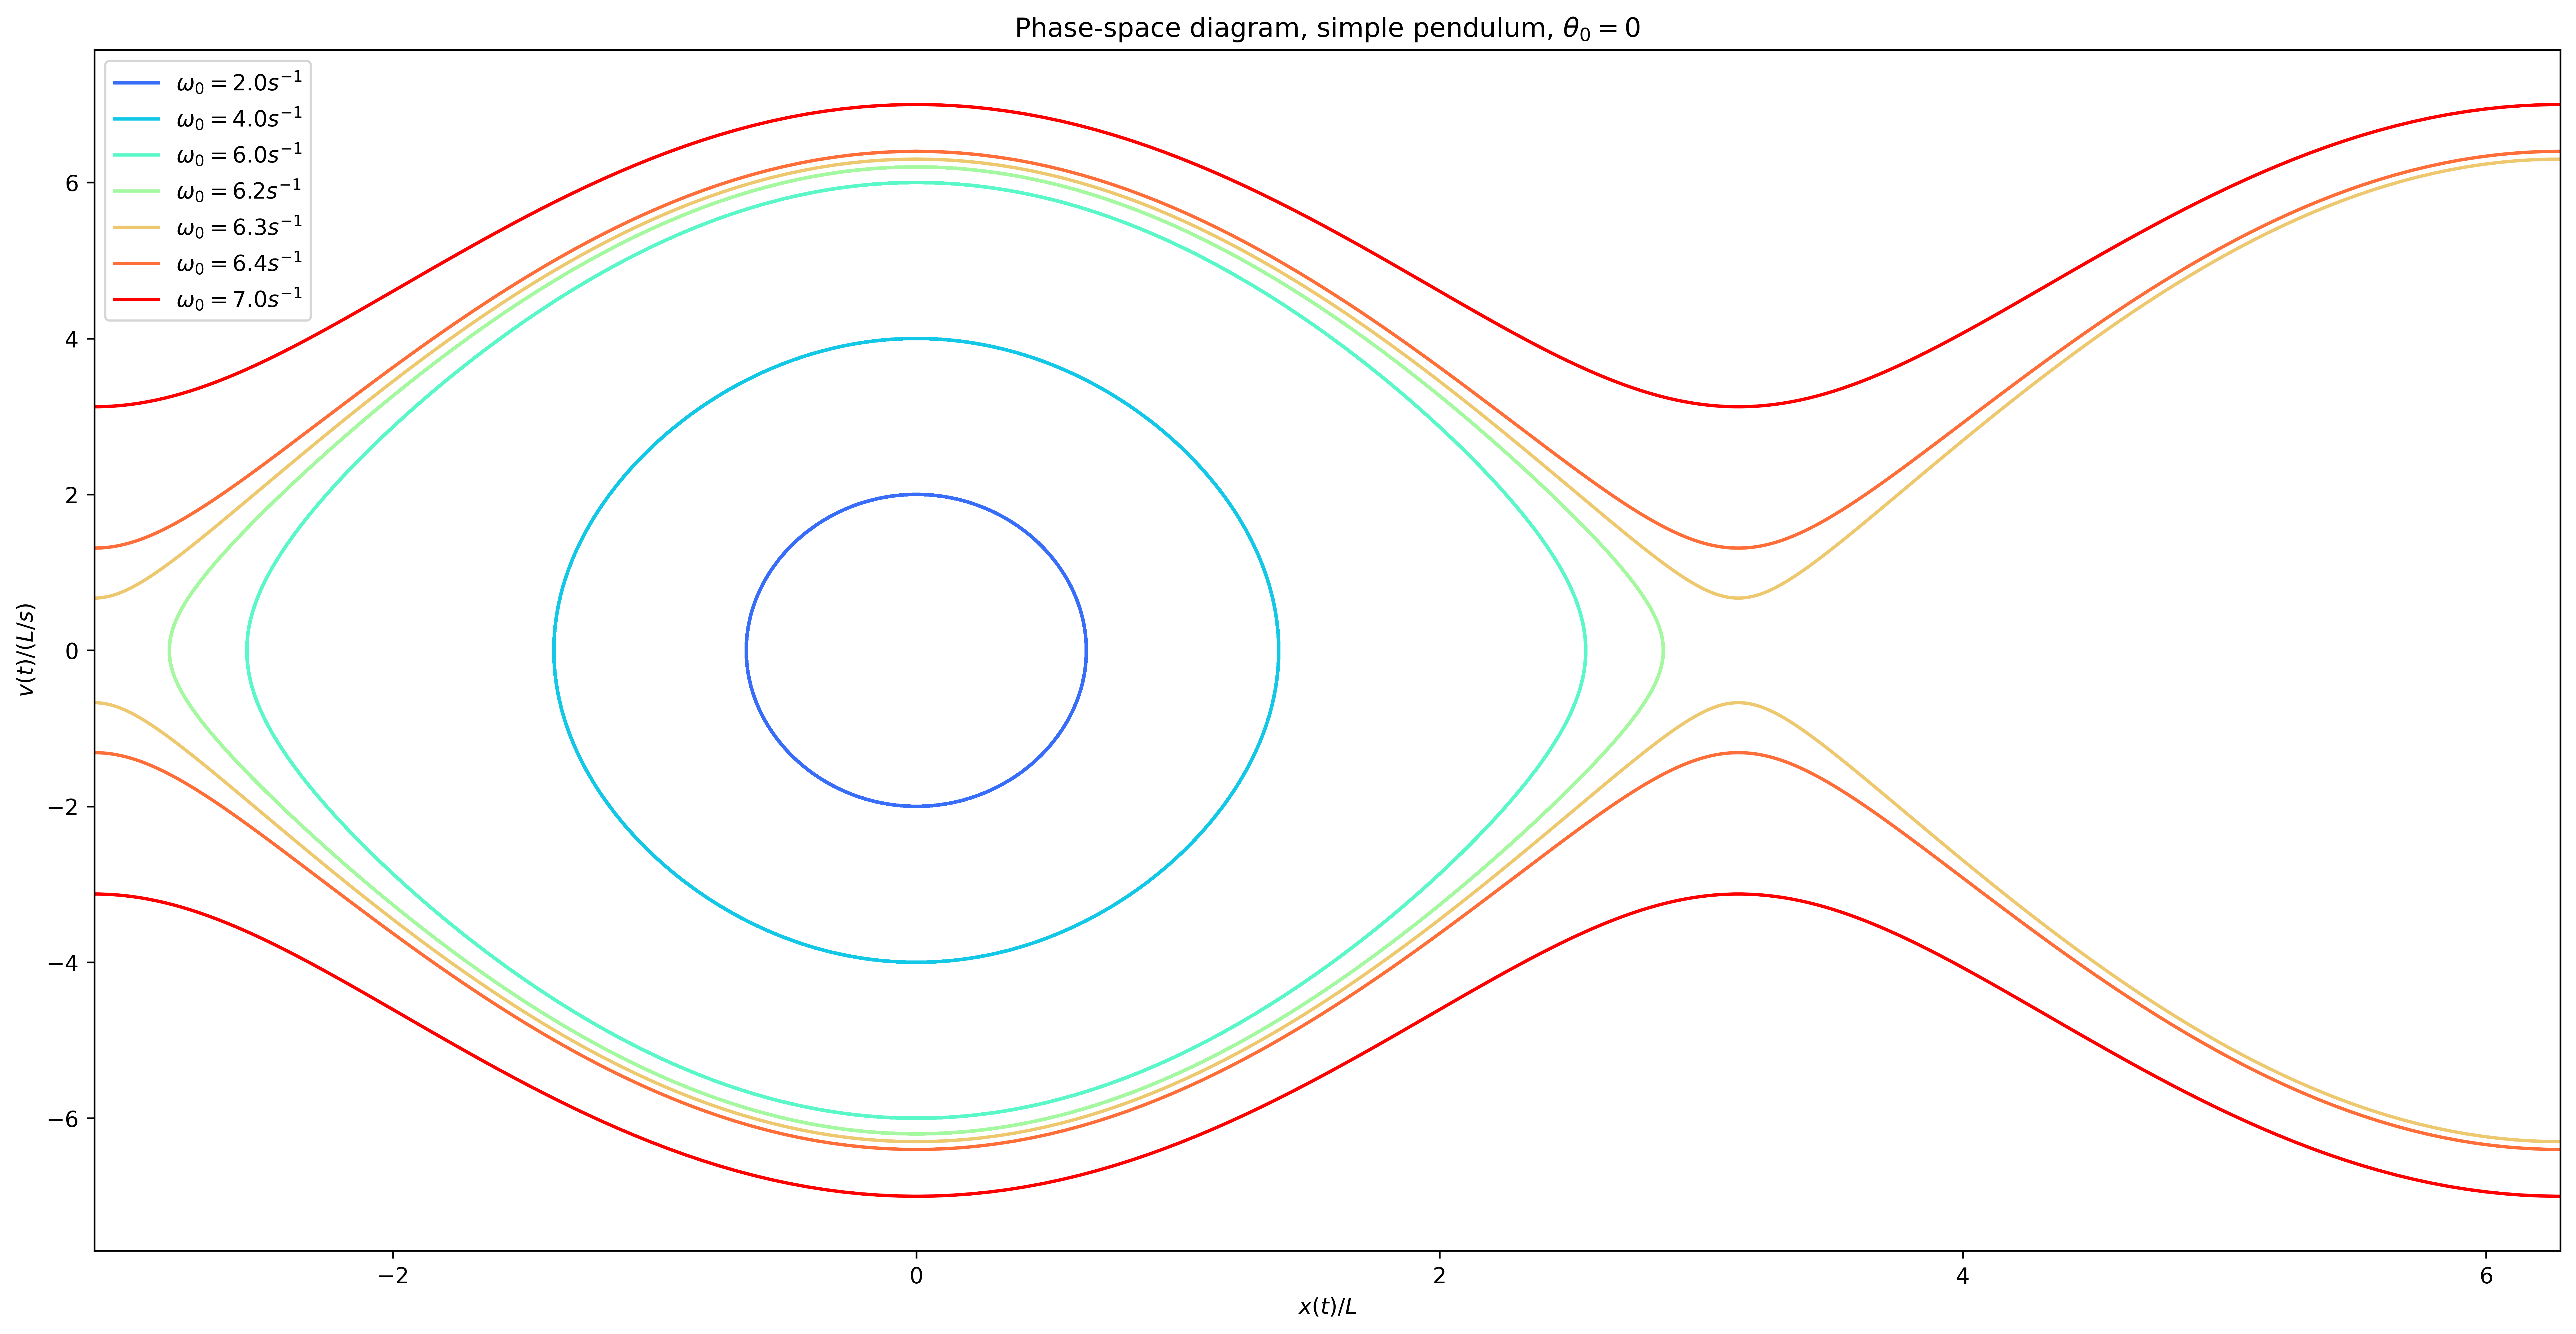

In [ ]:
# CONDICIONES INICIALES DE 'W'
w0 = [2., 4., 6, 6.2, 6.3, 6.4, 7.]

L = 1.
g = 9.81

# TEMPORAL (DOMINIO)
tmax_simp, dt_simp = 4, 0.01
t_simp = arange(0, tmax+dt, dt)

# PLOTEO DE LA FIGURA 
plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
plt.title(r"Diagrama de PLANO FASE, PENDULO SIMPLE, $\theta_0=0$")

for i in range(len(w0)):
    z = odeint(RHS_simple, [0, w0[i]], t_simp, args=(L, g))  # SOLUCION NUMERICA
    
    theta_simp, w_simp = z[:,0], z[:,1]  # RENOMBRANDO LAS VARIABLES 
    color = cm.rainbow(float(i + 1)/len(w0)) # Creating colormap (Plano de Colores)

    # PLOTEO DE LAS SOLUCIONES (PLANO FASE)
    plt.plot(theta_simp, w_simp, c=color, label=r"$\omega_0=%.1fs^{-1}$"%(w0[i]))
    plt.plot(theta_simp, -w_simp, c=color)
    plt.plot(-theta_simp, w_simp, c=color)
    plt.plot(-theta_simp, -w_simp, c=color)

plt.xlabel(r"$x(t)/L$")
plt.ylabel(r"$v(t)/(L/s)$")
plt.xlim([-pi, 2*pi])
plt.legend()
plt.show()

Aunque no se muestra completamente, el diagrama de espacio de fase es periódico con período $ 2 \pi $. Tenga en cuenta lo siguiente sobre el diagrama de espacio de fase para el péndulo simple:

- Para un potencial armónico, los diagramas de espacio de fase se convierten en elipses. Para $ \theta_ \text{max} $ pequeños, y por lo tanto $ \omega_0 $ pequeños, el potencial del péndulo simple es aproximadamente armónico y los diagramas de espacio de fase son elipses para $ \ omega_0 $ pequeños.
- Para aumentar $ \omega_0 $, las órbitas se vuelven más anarmónicas y obtienen esquinas angulares cada vez más diferenciadas en $ \theta (t) = \pm \pi $.
- Las órbitas cerradas corresponden a oscilaciones periódicas, mientras que las órbitas abiertas corresponden a movimientos no periódicos (o "en marcha").
- Si tuviéramos que incluir la fricción, como en el caso del péndulo amortiguado, la órbita del espacio de fase formará una espiral en un punto fijo.
- No se cruzan diferentes órbitas, ya que la solución para diferentes condiciones iniciales es única.


## Diagramas de espacio de fase para el péndulo doble

El movimiento del péndulo doble es mucho más complejo que el del péndulo simple. Por conveniencia, solo consideraremos el movimiento de la masa $ m_2 $. Tracemos el diagrama de espacio de fase para el péndulo doble discutido anteriormente. Con este fin, usaremos la función `plot_phasespace()`.

In [ ]:
def plot_phasespace(theta1, w1, theta2, w2):
    """ Creates a phase-space plot for the double pendulum
    for (theta, omega).
    
    theta1 : array-like, size(n,). The first angle in the double pendulum
    w1     : array-like, size(n,). Angular velocity of the first angle
    theta2 : array-like, size(n,). The second angle in the double pendulum
    w2     : array-like, size(n,). Angular velocity of the second angle
    """
    # DEFINICION PARA LA FIGURA (PLOTEO)
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
    plt.title(r"Phase-space diagram, $\theta_{10}=%.1f$, $\theta_{20}=%.1f$ "%(theta1[0], theta2[0])
             + r"$\omega_{10}=%.1f$, $\omega_{20}=%.1f$"%(w1[0], w2[0]))
    
    # PLOTEO
    plt.plot(theta1, w1, label=r"$i=1$")
    plt.plot(theta2, w2, label=r"$i=2$")
    
    plt.legend()
    plt.xlabel(r"$\theta_i$, [rad]")
    plt.ylabel(r"$\omega_i$, [rad/s]")
    xlim = [np.min(theta1), np.max(theta1), np.min(theta2), np.max(theta2)]
    plt.xlim(np.min(xlim), np.max(xlim))
    plt.show()

In [ ]:
plot_phasespace(theta1, w1, theta2, w2)

Una vez más, el movimiento del péndulo doble es claramente más complejo que el del péndulo simple. Sin embargo, se pueden reconocer algunas de las características de la estructura del diagrama de espacio de fase para el péndulo simple. Esto se ve más fácilmente en la órbita del espacio-fase por $ m_1 $. Aquí, podemos ver claramente que hay varias estructuras periódicas "como elípticas". Las trayectorias no permanecen en una sola estructura, sino que en cierto sentido se sienten atraídas por ellas. La "aleatoriedad" conduce a estructuras que consisten en bandas difusas, en lugar de las líneas simples obtenidas en el caso del péndulo simple. Esto es lo que caracteriza al *movimiento caótico*. Esta es también la razón por la que el movimiento del sistema es hipersensible al cambio en las condiciones iniciales (¡inténtelo usted mismo!).

Tenga en cuenta que el movimiento de la masa $ m_2 $ tiene una tendencia mayor a rotar que $ m_1 $. En otras palabras, $ \theta_1 $ aumenta más rápido que $ \theta_2 $ en función del tiempo. En este sentido, el movimiento de la masa $ m_1 $ es más "aleatorio".

¡Juega con otras condiciones iniciales!

## 5. Resumen

* Al resolver una ecuación diferencial ordinaria en forma analítica, el resultado es una función, $f$, que nos permite calcular la población, $f(t)$, para cualquier valor de t. Al resolver una ecuación diferencial ordinaria en forma numéricamente, se obtienen dos matrices de una dimensión. Podemos pensar a estas matrices como una aproximación discreta de la función continua $f$: "discreta", ya que sólo se define para ciertos valores de $t$, y "aproximada", porque cada valor Fi es sólo una estimación del verdadero valor de $f(t)$. 

* Se introdujo el movimiento caótico con el doble péndulo como ejemplo. Aunque el movimiento del sistema es caótico, están claras las estructuras del espacio de fase. Esto significa que hay un orden subyacente en el caos.

Por tanto, estas son limitaciones de las soluciones numéricas. 

La principal ventaja es que se puede calcular soluciones numéricas de ecuaciones diferenciales ordinarias que no tienen soluciones analíticas, que son la gran mayoría de las ecuaciones diferenciales ordinarias no lineales.


## 6. Recursos útiles
* ["Documentación de SymPy"](https://docs.sympy.org/latest/index.html)
* ["Ejemplos avanzados de SymPy"](https://www.youtube.com/watch?v=r4piIKV4sDw)
* ["Métodos Numéricos con Python"](https://github.com/pachocamacho1990/MetNum_Py)
* ["Ejemplos numéricos"](https://www.numfys.net/examples/)
*¨["Método del disparo"](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.02-The-Shooting-Method.html)
* ["Runge-Kutta orden 4"](https://github.com/pachocamacho1990/MetNum_Py)
* ["Péndulo doble"](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/double_pendulum.ipynb)
* ["SciPy integrate documentation"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
* Eric Ayars , 'Computational Physics with Python" (libro completo [aquí](https://belglas.files.wordpress.com/2018/03/cpwp.pdf))
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* Richard L. Burden, 'Analisis Numerico', 10ma Edición
* `scipy.integrate.odeint`, [scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).  
* Landau, R. H., Páez, M. J. and Bordeianu, C. C.: Computational Physics, 2nd edition, WILEY-VCH 2007.
* ["Péndulo simple"](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb).

## 7. Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>